# Entrega Trabajo Final Módulo: Machine Learning for Data Science y Soluciones Prescriptiva 

**Alumno :Alvaro Cesar Tauma Salvador**

* **La presentación de los resultados deberá de estar en un notebook de Jupyter Notebooks, tomando en cuenta el siguiente orden:**

a.     Nombre del análisis a desarrollar con los participantes involucrados.

b.     Descripción del caso.

c.      Código para hacer la extracción, transformación y procesamiento de las distintas variables, teniendo en cuenta dar el paso a paso de que se está realizando y el porqué.

d.     Plot de figuras necesarias para la realización de su análisis con su respectiva descripción.

e.     Código de uso del Algoritmo o algoritmos utilizados con su respectivo porqué.

f.     Verificar que los datos de testeo tengan un buen ajuste por medio de métricas.

IMPORTANTE: El notebook a cargar en la plataforma debe de ser el último notebook corrido para poder directamente visualizar los resultados obtenidos y hacer el contraste (debido a que se correrá nuevamente).

Cada participante, en caso sea por equipos debe cargar el mismo notebook, ya que será contrastado.

El equipo debe ser de no más de 3 personas.

<center><b>Salary Prediction Classification</b></center>


<img src="https://repository-images.githubusercontent.com/293898841/c91e7100-5e42-11eb-9820-2f68d80ed516" width="250">


## a.     Nombre del análisis a desarrollar con los participantes involucrados.

Aplicacion del algortimo  de Machine Learning para clasificar si  una persona  gana mas de 50k al año 

Alumno :Alvaro Cesar Tauma Salvador

## b.     Descripción del caso.

El objetivo es predecir si una persona gana más de $50,000  o no,apartir de un conjunto de datos que incluye características como edad, clase de trabajo, nivel educativo, estado civil, ocupación, relación, raza, sexo, ganancia de capital, pérdida de capital, horas de trabajo por semana y país de origen.

## c.      Código para hacer la extracción, transformación y procesamiento de las distintas variables, teniendo en cuenta dar el paso a paso de que se está realizando y el porqué.

In [314]:
# Lectura de Librerias
import os
import random as rnd
import pandas as pd
import numpy as np
import itertools
import gc
import networkx as nx
from sklearn import metrics
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

## Modelos de Machine Learning
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix



## Selección de Variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

## Validación Cruzada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Common seed value to be used whenever required
seed = 16
np.random.seed(seed)

In [315]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  
#mostrar todos los resultados intermedios durante la ejecución del código en una sola línea.

## Extraccion 

In [316]:
## data 
dataset = pd.read_csv('data.csv',sep=',')
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Análisis Exploratorio de Datos (EDA)

In [483]:
#age: La edad de la persona, variable continua.
#workclass: El tipo de empleo, con varias categorías como privado, autónomo, gobierno federal, gobierno local, etc.
#fnlwgt: Un peso de muestreo que indica cuántas personas en la población representa esta persona. Variable continua.
#education: El nivel educativo alcanzado, con diversas categorías que van desde la educación preescolar hasta doctorado.
#education-num: El número asociado al nivel educativo, variable continua.
#marital-status: El estado civil de la persona, con categorías como casado, divorciado, soltero, viudo, etc.
#occupation: La ocupación de la persona, con categorías como soporte técnico, reparación de artesanías, ventas, etc.
#relationship: La relación de la persona en la familia, como esposa, hijo propio, esposo, etc.
#race: La raza de la persona, con categorías como blanca, asiático-pacífico, amerindio-esquimal, etc.
#sex: El sexo de la persona, femenino o masculino.
#capital-gain: Las ganancias de capital de la persona, variable continua.
#capital-loss: Las pérdidas de capital de la persona, variable continua.
#hours-per-week: El número de horas trabajadas por semana, variable continua.
#native-country: El país de origen de la persona.
#salary: La variable objetivo que indica si la persona gana más de 50K o menos de 50k.

In [318]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [319]:
dataset.shape

(32561, 15)

In [320]:
#Variables Personales:
#age (edad)
#sex (sexo)
#race (raza)
#native-country (país de origen)

#Variables Laborales:
#workclass (tipo de empleo)
#occupation (ocupación)
#hours-per-week (horas trabajadas por semana)

#Variables Educativas:
#education (nivel educativo)
#education-num (número asociado al nivel educativo)

#Variables Financieras:
#fnlwgt 
#capital-gain (ganancias de capital)
#capital-loss (pérdidas de capital)

#Variables Relacionales/Familiares:
#marital-status (estado civil)
#relationship (relación en la familia)

#Variable Objetivo:
#salary (ingreso: <=50K o >50K)

In [321]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [322]:
# Dataset characteristics
print("Número de instancias en el conjunto de datost = {}".format(dataset.shape[0]))
print("Número total de columnas = {}".format(dataset.columns.shape[0]))
print("Recuento de valores nulos en columnas:-")
print(dataset.isnull().sum())

Número de instancias en el conjunto de datost = 32561
Número total de columnas = 15
Recuento de valores nulos en columnas:-
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [323]:
Personales=["age","sex","race","native-country"]
Laborales=["workclass","occupation","hours-per-week"]
Educativas=["education","education-num"]
Financieras=["fnlwgt","capital-gain","capital-loss"]
Relacionales=["marital-status","relationship"]
Target=["salary"]

In [324]:
dataset[Personales].describe()
dataset[Personales].describe(include='object')

,age
count,32561.000000
mean,38.581647
std,13.640433
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


,sex,race,native-country
count,32561,32561,32561
unique,2,5,42
top,Male,White,United-States
freq,21790,27816,29170


In [325]:
dataset[Laborales].describe()
dataset[Laborales].describe(include='object')

,hours-per-week
count,32561.000000
mean,40.437456
std,12.347429
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


,workclass,occupation
count,32561,32561
unique,9,15
top,Private,Prof-specialty
freq,22696,4140


In [326]:
dataset[Educativas].describe()
dataset[Educativas].describe(include='object')

,education-num
count,32561.000000
mean,10.080679
std,2.572720
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


,education
count,32561
unique,16
top,HS-grad
freq,10501


In [327]:
dataset[Financieras].describe()

,fnlwgt,capital-gain,capital-loss
count,3.256100e+04,32561.000000,32561.000000
mean,1.897784e+05,1077.648844,87.303830
std,1.055500e+05,7385.292085,402.960219
min,1.228500e+04,0.000000,0.000000
25%,1.178270e+05,0.000000,0.000000
50%,1.783560e+05,0.000000,0.000000
75%,2.370510e+05,0.000000,0.000000
max,1.484705e+06,99999.000000,4356.000000


In [328]:
dataset[Relacionales].describe(include='all')

,marital-status,relationship
count,32561,32561
unique,7,6
top,Married-civ-spouse,Husband
freq,14976,13193


In [329]:
dataset[Target].describe(include='all')

,salary
count,32561
unique,2
top,<=50K
freq,24720


In [330]:
dataset[Target].value_counts()
dataset[Target].value_counts(normalize=True)

salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

salary
 <=50K    0.75919
 >50K     0.24081
Name: proportion, dtype: float64

**Se observa un desbalance en la data target con un 76% de datos para la clase \%75 "<=50K" y 24\%  ">50K"**

## d.     Plot de figuras necesarias para la realización de su análisis con su respectiva descripción.


**Se observa un cambio en la distribución de la edad con respecto a la variable objetivo (salario), lo cual podría indicar que la edad puede ser un factor importante en la determinación del salario .En las variable "capital-gain"y "capital-loss" se identifico que tiene muchos valores de cero. Dado que estos valores pueden afectar negativamente el rendimiento del modelo al introducir ruido o sesgo se opto por retirarlas en modelo.Tambien se realizo la matriz de correlacion  para las variables numéricas ,se observa que no existe una correlación significativa entre ellas.**


## Vizualización de los Datos

###  Gráficos de barras  de variables categoricas con respecto al salario

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='workclass', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable workclass segun el  Salario')

Text(0.5, 0, 'workclass')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

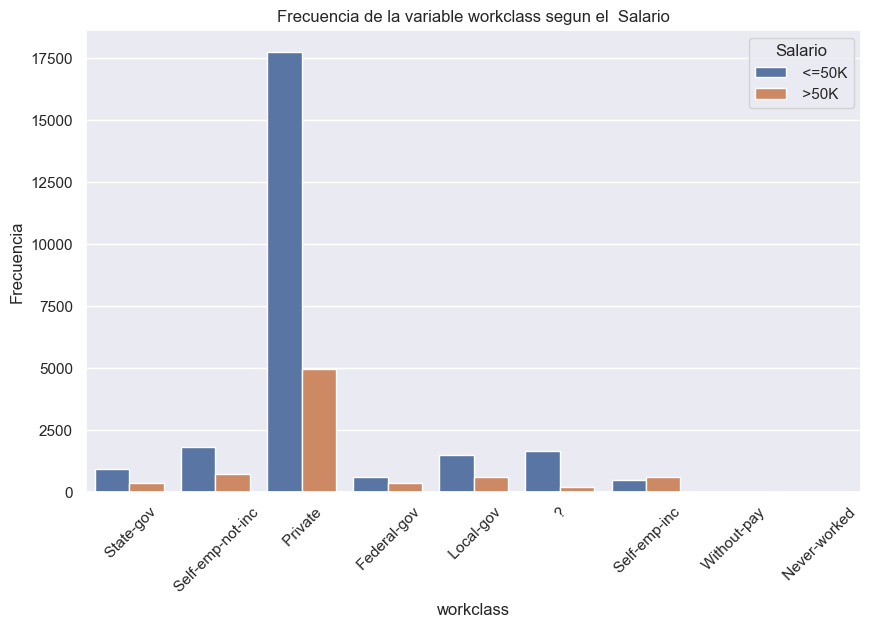

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='education', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable education segun el  Salario')

Text(0.5, 0, 'education')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

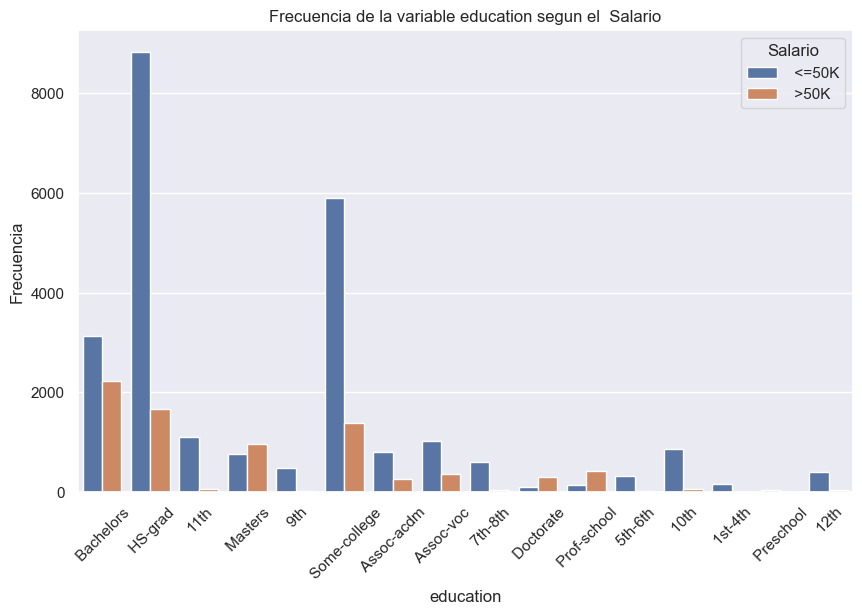

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='marital-status', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable marital-status segun el  Salario')

Text(0.5, 0, 'marital-status')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

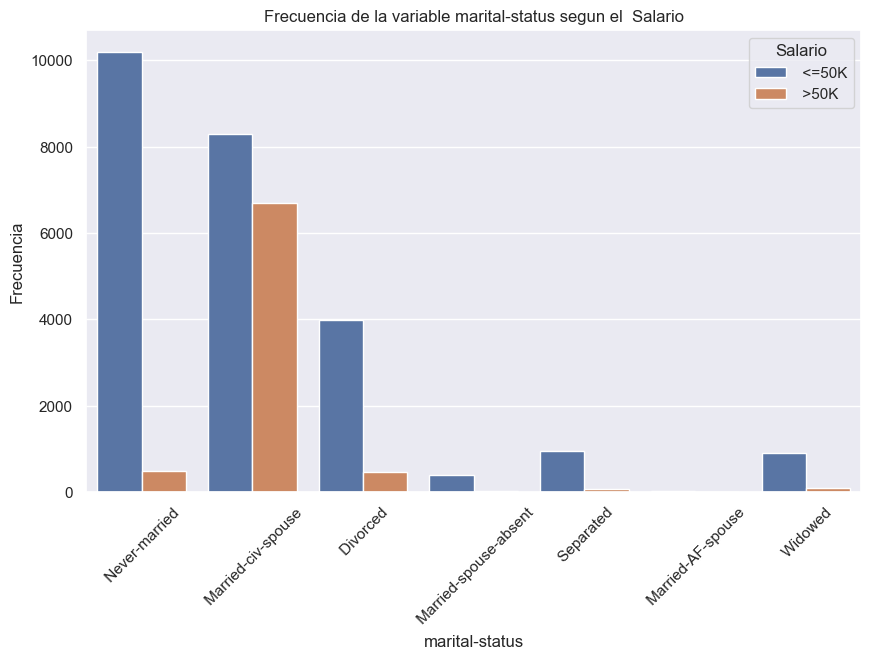

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='occupation', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable occupation segun el  Salario')

Text(0.5, 0, 'occupation')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

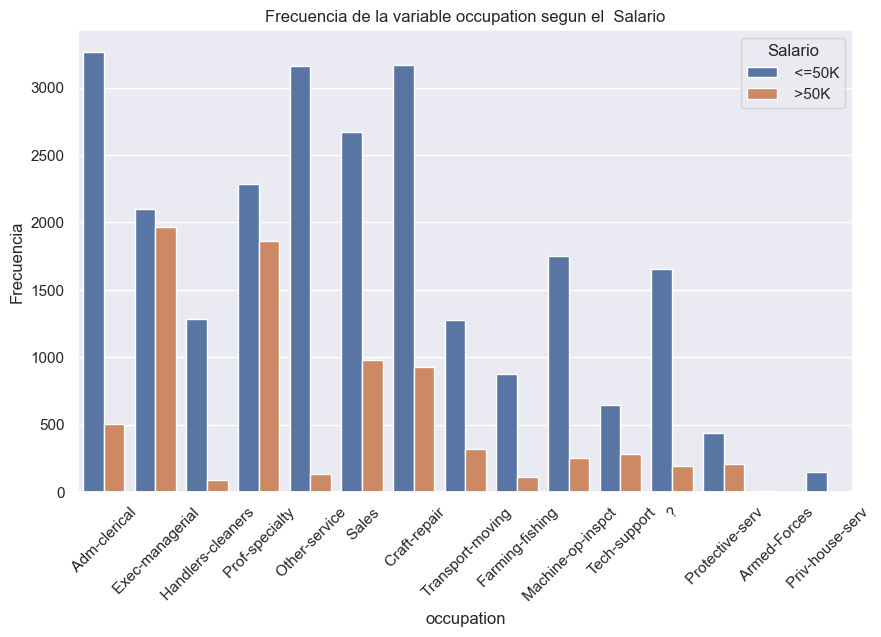

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='relationship', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable relationship segun el  Salario')

Text(0.5, 0, 'relationship')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Not-in-family'),
  Text(1, 0, ' Husband'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

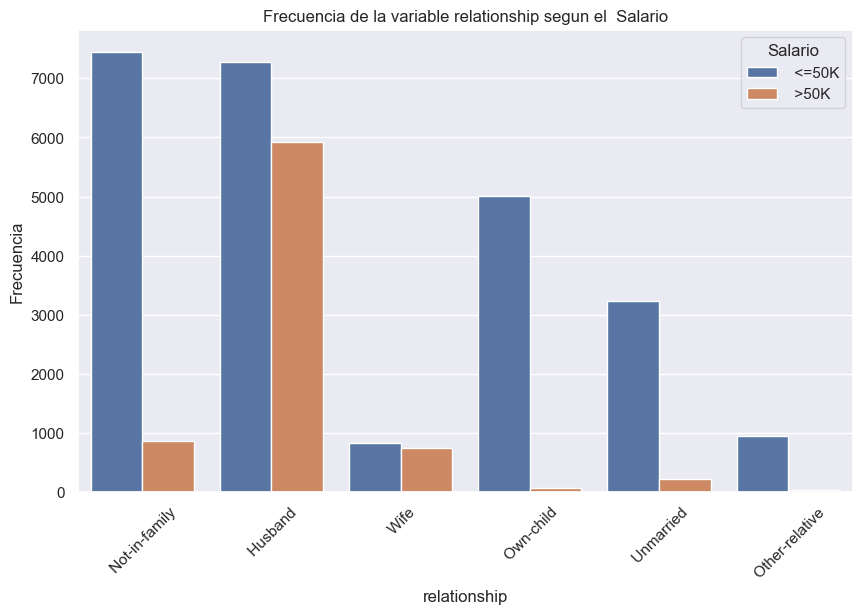

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='race', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable race segun el  Salario')

Text(0.5, 0, 'race')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

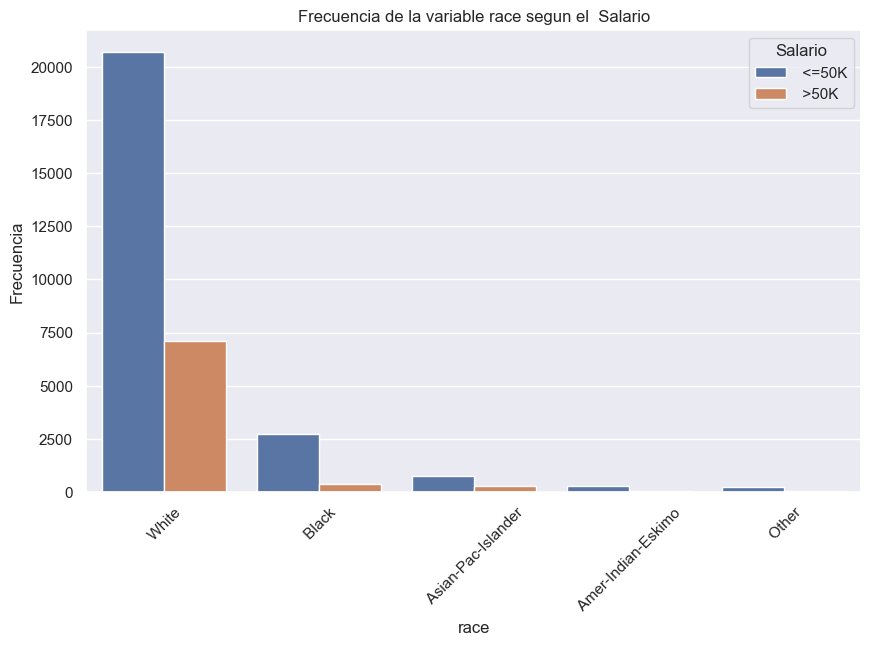

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sex', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable sex segun el  Salario')

Text(0.5, 0, 'sex')

Text(0, 0.5, 'Frecuencia')

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

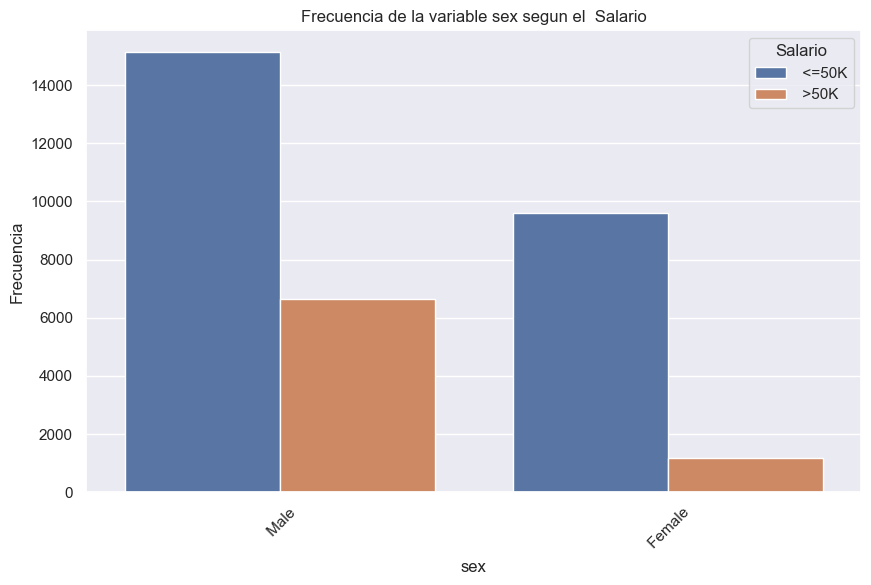

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='native-country', ylabel='count'>

Text(0.5, 1.0, 'Frecuencia de la variable native-country segun el  Salario')

Text(0.5, 0, 'native-country')

Text(0, 0.5, 'Frecuencia')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

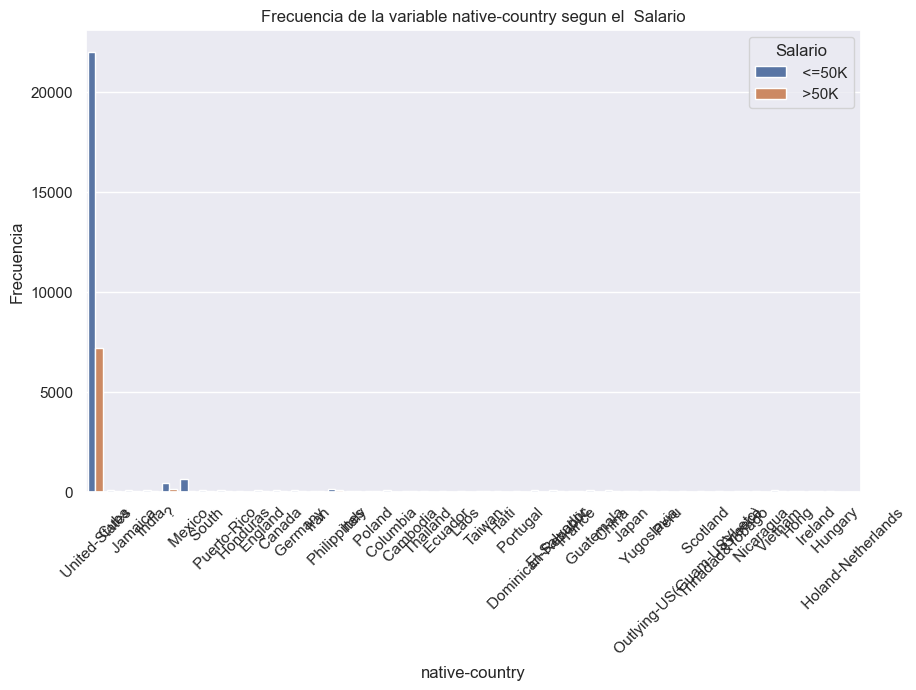

In [331]:

categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    if col != 'salary':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='salary', data=dataset)
        plt.title(f'Frecuencia de la variable {col} segun el  Salario')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        add_percentage_labels(plot, col)
        plt.legend(title='Salario', loc='upper right')
        plt.show()


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

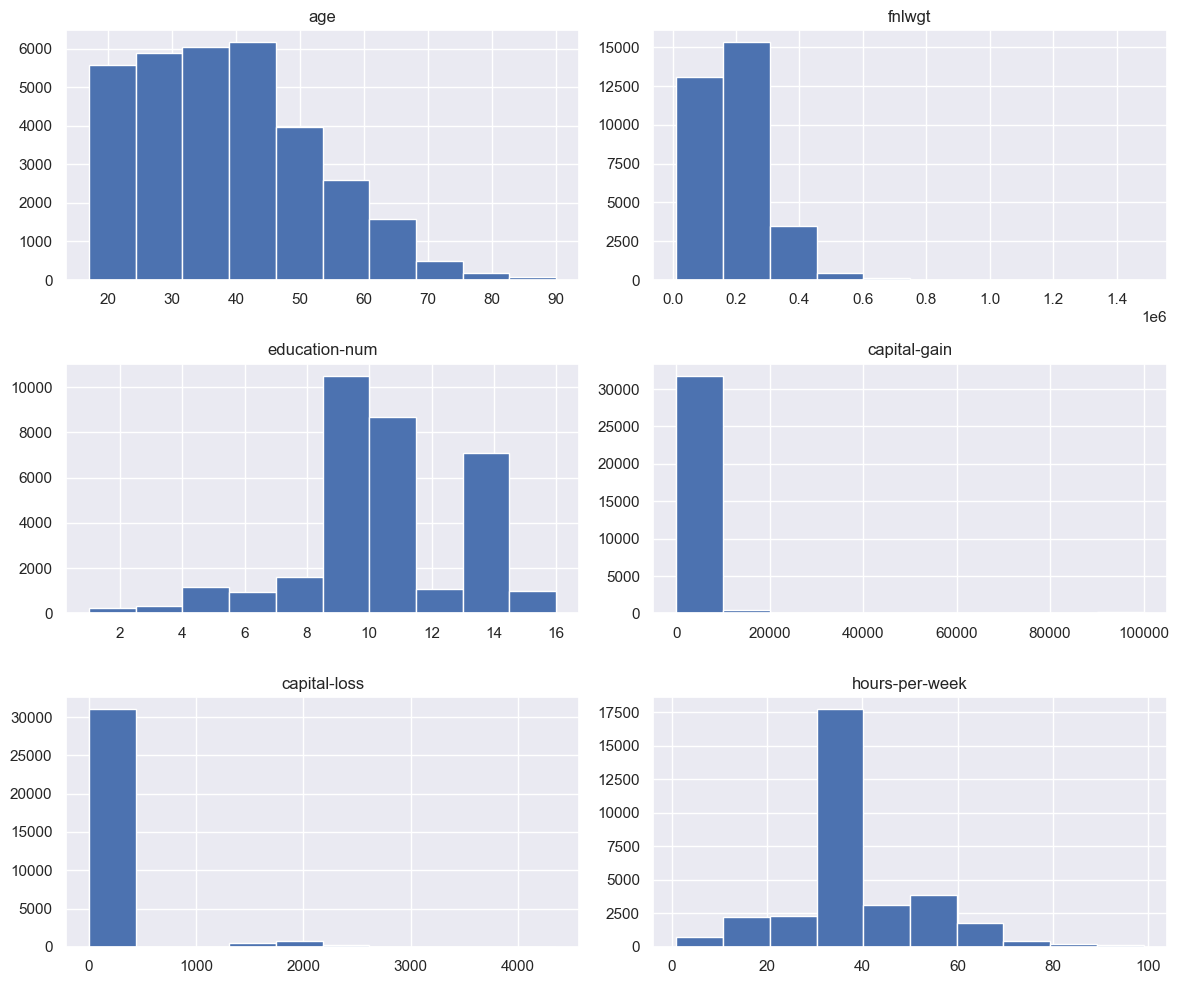

In [332]:
# Histogramas para variables numéricas
dataset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Histogramas y grafico de densidad para variables numéricas con respecto al salario

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Distribucion de la variable age segun el  Salario')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Frecuencia')

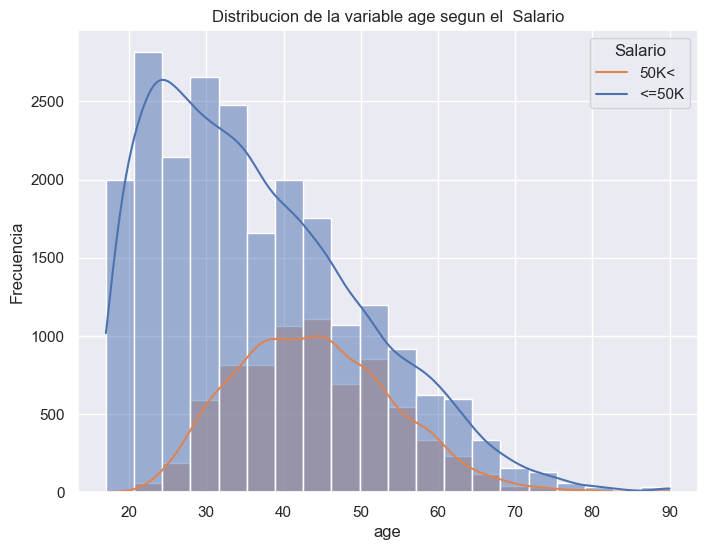

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='education-num', ylabel='Count'>

Text(0.5, 1.0, 'Distribucion de la variable education-num segun el  Salario')

Text(0.5, 0, 'education-num')

Text(0, 0.5, 'Frecuencia')

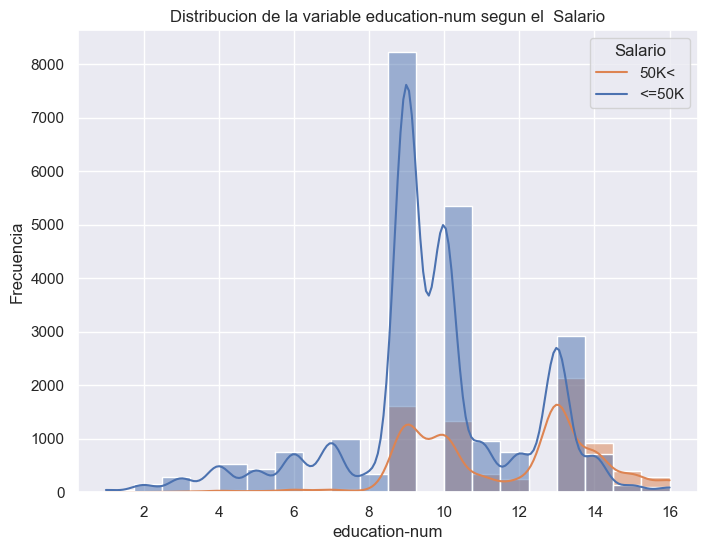

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='capital-gain', ylabel='Count'>

Text(0.5, 1.0, 'Distribucion de la variable capital-gain segun el  Salario')

Text(0.5, 0, 'capital-gain')

Text(0, 0.5, 'Frecuencia')

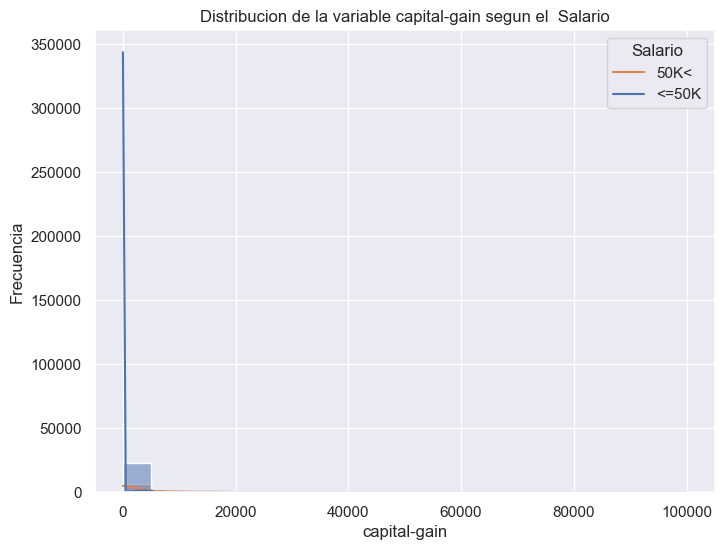

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='capital-loss', ylabel='Count'>

Text(0.5, 1.0, 'Distribucion de la variable capital-loss segun el  Salario')

Text(0.5, 0, 'capital-loss')

Text(0, 0.5, 'Frecuencia')

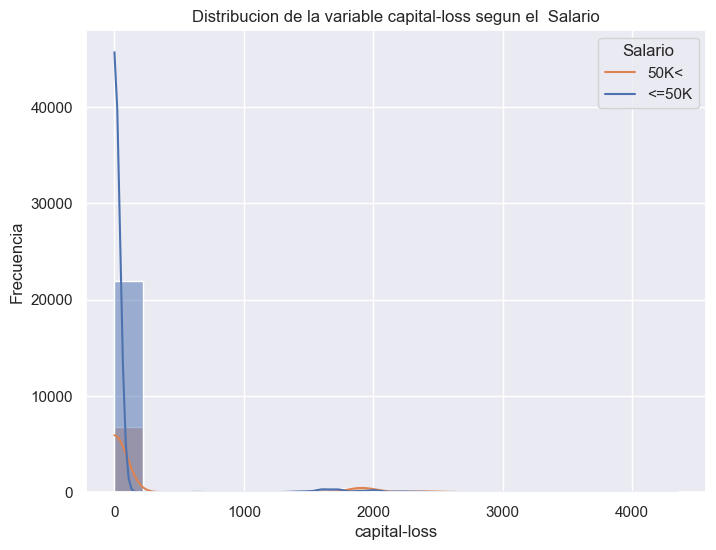

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='hours-per-week', ylabel='Count'>

Text(0.5, 1.0, 'Distribucion de la variable hours-per-week segun el  Salario')

Text(0.5, 0, 'hours-per-week')

Text(0, 0.5, 'Frecuencia')

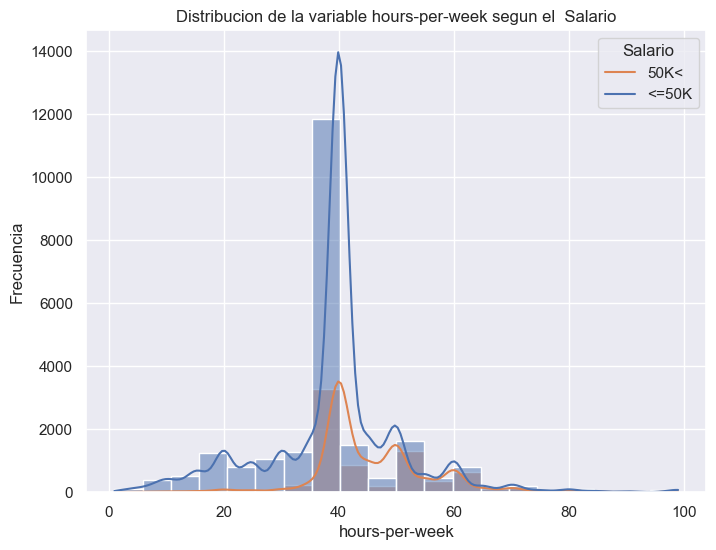

In [333]:
Columnasnumericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in Columnasnumericas:
    if col != 'salary':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=data, x=col, hue='salary', kde=True, bins=20)
        plt.title(f'Distribucion de la variable {col} segun el  Salario')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.legend(title='Salario',labels=['50K<', '<=50K'])
        plt.show()

## Boxplot de la Edad por cada Sexo con respecto al Target

In [ ]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x="sex", y="age", hue="salary", data=dataset, palette="Set1")
plt.show()

## Boxplot de la Edad por estado civil con respecto al Target

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='relationship', ylabel='hours-per-week'>

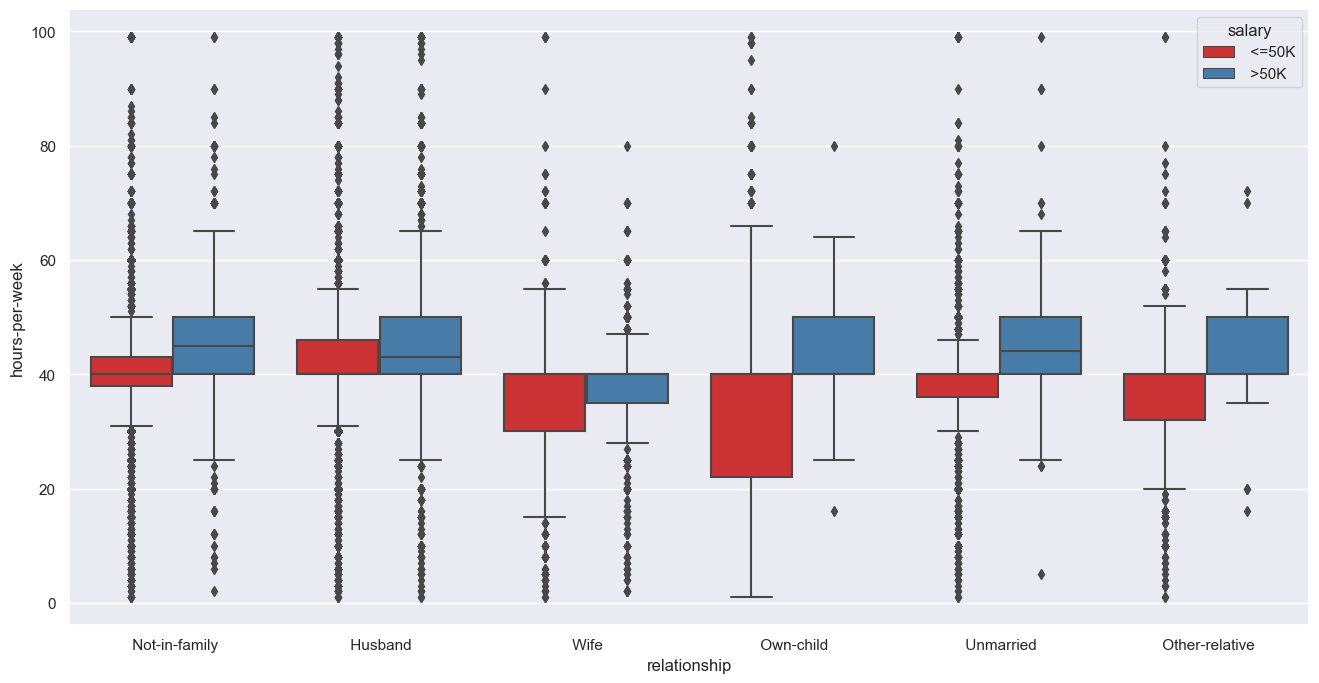

In [335]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x="relationship", y="hours-per-week", hue="salary", data=dataset, palette="Set1")
plt.show()

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='sex', ylabel='age'>

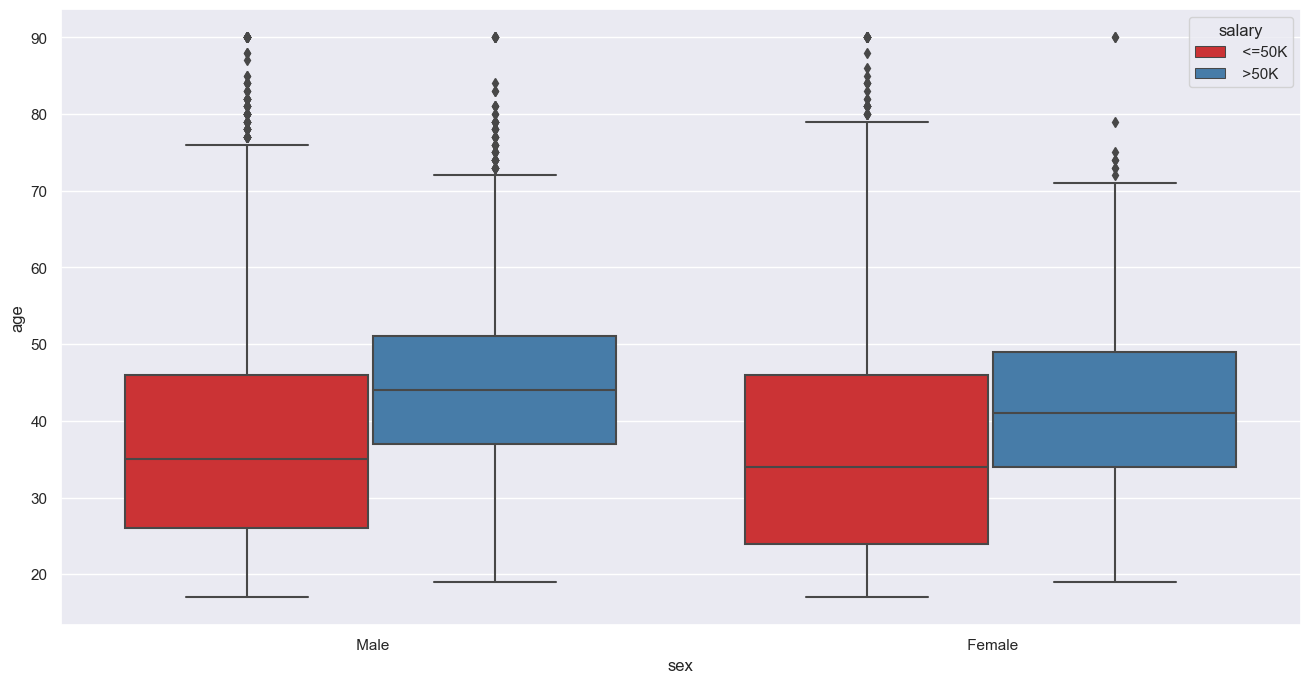

In [336]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x="sex", y="age", hue="salary", data=dataset, palette="Set1")
plt.show()

<Axes: >

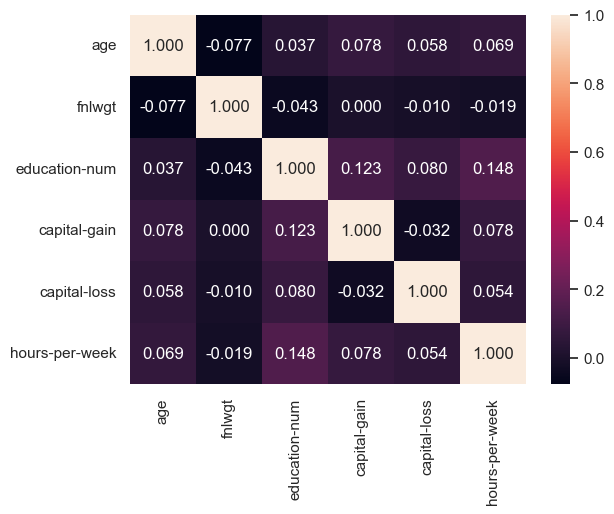

In [337]:
columnas_numericas = dataset.select_dtypes(include=['int64'])
corr_matrix=columnas_numericas.corr()
sns.heatmap(corr_matrix,annot=True, fmt=".3f")

## Codificando las Variables Categoricas utilizando el LabelEncoder

In [349]:
## selection of category variables
target = 'salary'
exclude = ['capital-loss','capital-gain']

cols = [x for x in dataset.columns if x not in exclude + [target]]
cols_cat = dataset[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)

## For Training
for i in cols_cat:
    le = preprocessing.LabelEncoder()
    le.fit(list(dataset[i].dropna()))
    dataset.loc[~dataset[i].isnull(),i]=le.transform(dataset[i].dropna())
dataset[cols].head()

['capital-loss', 'capital-gain'] 

 [1, 3, 5, 6, 7, 8, 9, 11] ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,40,39
1,50,6,83311,9,13,2,4,0,4,1,13,39
2,38,4,215646,11,9,0,6,1,4,1,40,39
3,53,4,234721,1,7,2,6,0,2,1,40,39
4,28,4,338409,9,13,2,10,5,2,0,40,5


## e.     Código de uso del Algoritmo o algoritmos utilizados con su respectivo porqué.

**Se ha utilizado un un modelo de machine learning en este caso se ha utilizado el algoritmo de arboles de desicion con el fin de clasificar una persona si gana más de 50,000 o no.Tambien se realizo el preprocesamiento de datos y la división de los datos en conjuntos de entrenamiento y prueba.**

In [363]:
# Prepacion de la data y particion de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X,y = dataset.drop(['capital-loss','capital-gain','fnlwgt', 'salary'], axis=1),dataset[["salary"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

### Obtención de los mejores hiperparametros

In [364]:
from pprint import pprint
modeloparametros =DecisionTreeClassifier()
pprint(modeloparametros.get_params())#Hiperparametros del modelos 
#muestra todos los hiperparametros del modelo de arboles 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}


In [450]:
# Definir la grilla de hiperparámetros para la búsqueda aleatoria
param_grid = {
    'max_depth': [8, 10, 12, 14],              # Profundidad máxima del árbol
    'min_samples_split': [30, 50, 100, 150],      # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [30, 50, 60,70],             # Número mínimo de muestras requeridas en un nodo hoja
    'criterion': ['gini', 'entropy']          # Criterio para evaluar la calidad de una división (Gini impurity o Entropía)
}


# Inicializar el modelo
model = DecisionTreeClassifier()
# Inicializar RandomizedSearchCV
random_grid = RandomizedSearchCV(model,
                                   param_distributions=param_grid,
                                   n_iter=10, 
                                   random_state=42, 
                                   cv=5, scoring='accuracy')

# Realizar la búsqueda aleatoria de hiperparámetros
random_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 10, 12, 14],
                                        'min_samples_leaf': [30, 50, 60, 70],
                                        'min_samples_split': [30, 50, 100,
                                                              150]},
                   random_state=42, scoring='accuracy')

In [448]:
# Mejores hiperparámetros encontrados
best_params = random_grid.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'min_samples_split': 150, 'min_samples_leaf': 30, 'max_depth': 10, 'criterion': 'gini'}


In [454]:
# Mejor puntuación de validación cruzada
best_score = random_grid.best_score_
print("Mejor puntuación de validación cruzada:", best_score)
# Mejor modelo encontrado
best_model = random_grid.best_estimator_
best_model

Mejor puntuación de validación cruzada: 0.8318591318591319


DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=150)

## f. Verificar que los datos de testeo tengan un buen ajuste por medio de métricas.

In [456]:
# Modelo con los mejores Hiperparametros 
benchmark_model = DecisionTreeClassifier(**best_params)
benchmark_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=150)

### Evaluacion de modelo mediante metricas 

In [481]:
# Separate the features and the target variable
predict_train_rl = benchmark_model.predict_proba(X_train)[:,1]
predict_test_rl = benchmark_model.predict_proba(X_test)[:,1]

In [482]:
#matriz de confusion
predict_lg_test = benchmark_model.predict(X_test)
cm=confusion_matrix(y_test, predict_lg_test)
cm

array([[5708,  595],
       [ 726, 1112]], dtype=int64)

In [429]:
## Metricas de Validación manual
predict_lg_test = benchmark_model.predict(X_test)
cm=confusion_matrix(y_test, predict_lg_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

ACC = accuracy_score(y_test, predict_lg_test)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
AUC = roc_auc_score(y_test, predict_test_rl)
GINI = 2*(AUC-0.5)

print("AUC : {:.3f}".format(AUC))
print("INDICE DE GINI : {:.3f}".format(GINI))
print("ACCURACY : {:.3f}".format(ACC))
print("SENSIBILIDAD O RECALL: {:.3f}".format(TPR))
print("ESPECIFICIDAD : {:.3f}".format(TPR))
print("PPV O PRECISION : {:.3f}".format(PPV))
print("NPV : {:.3f}".format(NPV))

AUC : 0.879
INDICE DE GINI : 0.758
ACCURACY : 0.838
SENSIBILIDAD O RECALL: 0.605
ESPECIFICIDAD : 0.605
PPV O PRECISION : 0.651
NPV : 0.887


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 33.249999999999986, 'Predicted')

Text(67.25, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

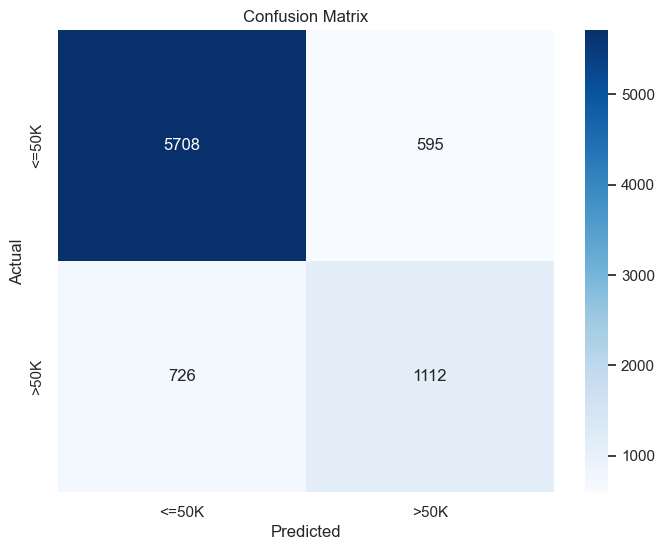

In [430]:

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, predict_lg_test)
# Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Validacion Cruzada

In [484]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
mean_accuracy = scores.mean()
mean_accuracy 

0.7825312378456091

**La precisión media del modelo a través de la validación cruzada del 78.25% indica que el modelo tiene un rendimiento aceptable  para clasificar si una persona gana mas de 50k o menos de 50k.**